In [2]:
import ROOT as r

Welcome to JupyROOT 6.24/07


In [3]:
import matplotlib.pyplot as plt
import mplhep as hep
from root_numpy import hist2array

In [4]:
testFileName = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

f = r.TFile.Open(testFileName)
tree = f.Get("Events")

Warning in <TClass::Init>: no dictionary for class __pair_base<edm::Hash<1>,edm::ParameterSetBlob> is available


In [7]:
hDijet01Masses = r.TH1F("dijet01m","",60,0,3000)
hDijet02Masses = r.TH1F("dijet01m","",60,0,3000)
hDijet12Masses = r.TH1F("dijet01m","",60,0,3000)
hTrijet012Masses = r.TH1F("dijet01m","",60,0,3000)

nEvts = tree.GetEntriesFast()

for i in range(nEvts):    
    tree.GetEvent(i)
    
    
    if tree.nFatJet<3:
        continue
    
    pts     = tree.FatJet_pt
    etas    = tree.FatJet_eta
    phis    = tree.FatJet_phi
    masses  = tree.FatJet_msoftdrop
    
    if   (pts[0] + pts[1] + pts[2] < 250 or
    abs(etas[0] + etas[1] + etas[2]) > 2.5  or
    masses[0] + masses[1] + masses[2] < 60)  :
        continue
    
    jet0 = r.TLorentzVector()
    jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])
    
    jet1 = r.TLorentzVector()
    jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])
    
    jet2 = r.TLorentzVector()
    jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])
    
    dijet01 = jet0 + jet1
    dijet02 = jet0 + jet2
    dijet12 = jet1 + jet2
    trijet012 = jet0 + jet1 + jet2
    
    hDijet01Masses.Fill(dijet01.M())
    hDijet02Masses.Fill(dijet02.M())
    hDijet12Masses.Fill(dijet12.M())
    hTrijet012Masses.Fill(trijet012.M())

Warning in <TFile::Append>: Replacing existing TH1: dijet01m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dijet01m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dijet01m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dijet01m (Potential memory leak).


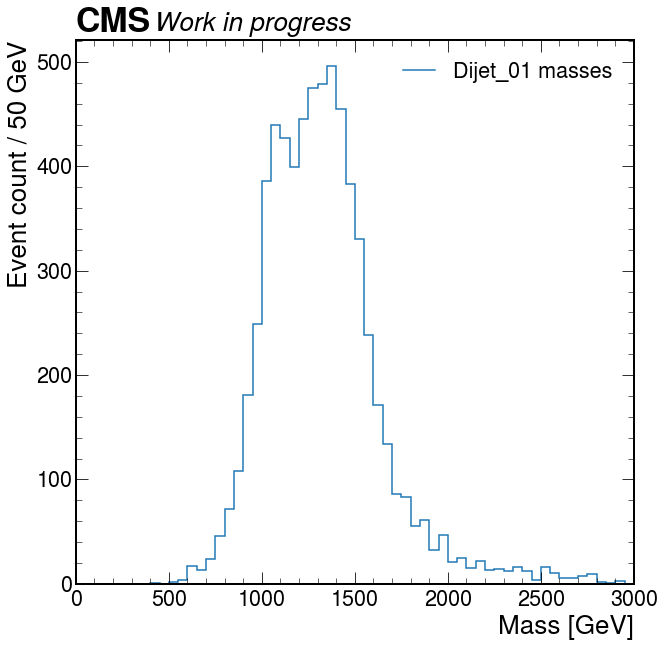

In [8]:
plt.style.use([hep.style.CMS])
counts, edges = hist2array(hDijet01Masses,return_edges=True)

edges = edges[0]
#It returns a list of arrays, where each array represents binning in one dimension. 
#We only work with 1D so we take edges[0]

hep.histplot(counts,edges,label="Dijet_01 masses")
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 3000])
plt.legend()
#plt.savefig("test.png")

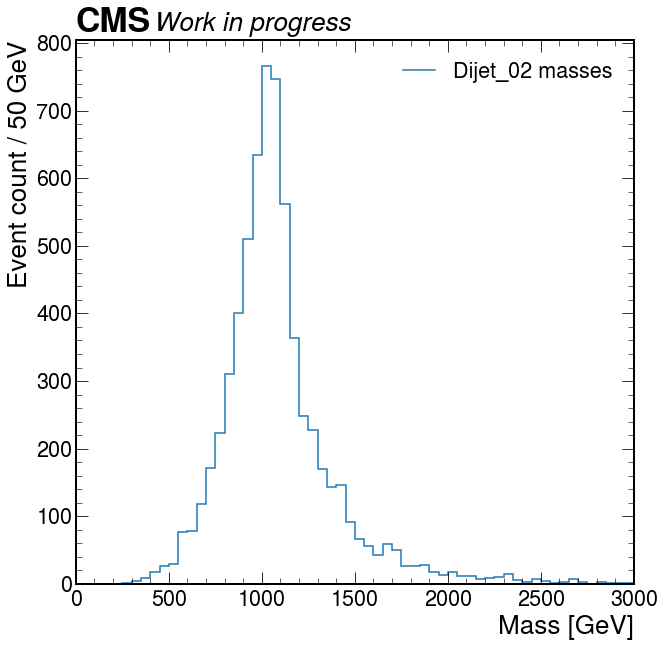

In [9]:
#dijet02

plt.style.use([hep.style.CMS])
counts, edges = hist2array(hDijet02Masses,return_edges=True)

edges = edges[0]
#It returns a list of arrays, where each array represents binning in one dimension. 
#We only work with 1D so we take edges[0]

hep.histplot(counts,edges,label="Dijet_02 masses")
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 3000])
plt.legend()

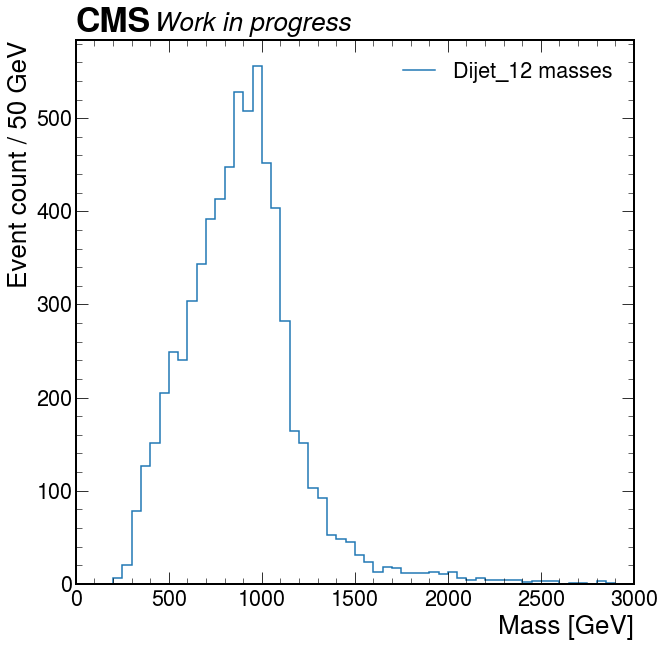

In [10]:
#dijet12

plt.style.use([hep.style.CMS])
counts1, edges1 = hist2array(hDijet12Masses,return_edges=True)

edges1 = edges1[0]
#It returns a list of arrays, where each array represents binning in one dimension. 
#We only work with 1D so we take edges[0]

hep.histplot(counts1,edges1,label="Dijet_12 masses")
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 3000])
plt.legend()

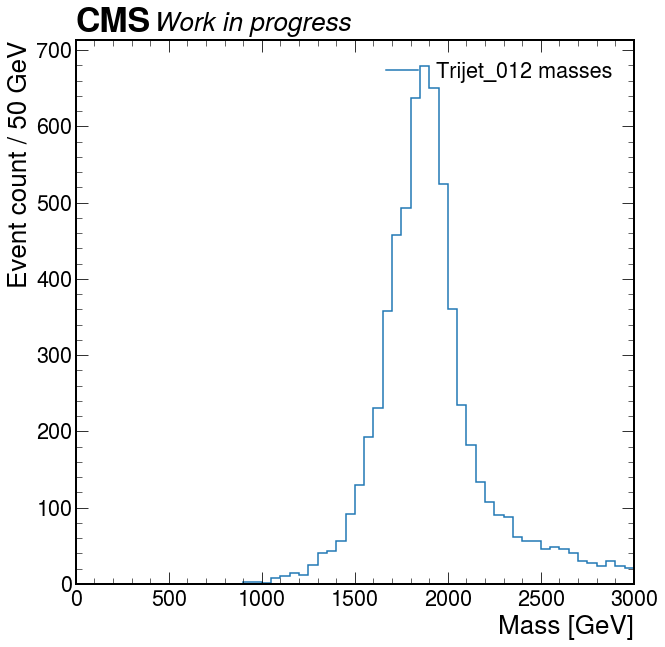

In [11]:
#trijet

plt.style.use([hep.style.CMS])
counts, edges = hist2array(hTrijet012Masses,return_edges=True)

edges = edges[0]
#It returns a list of arrays, where each array represents binning in one dimension. 
#We only work with 1D so we take edges[0]

hep.histplot(counts,edges,label="Trijet_012 masses")
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 3000])
plt.legend()

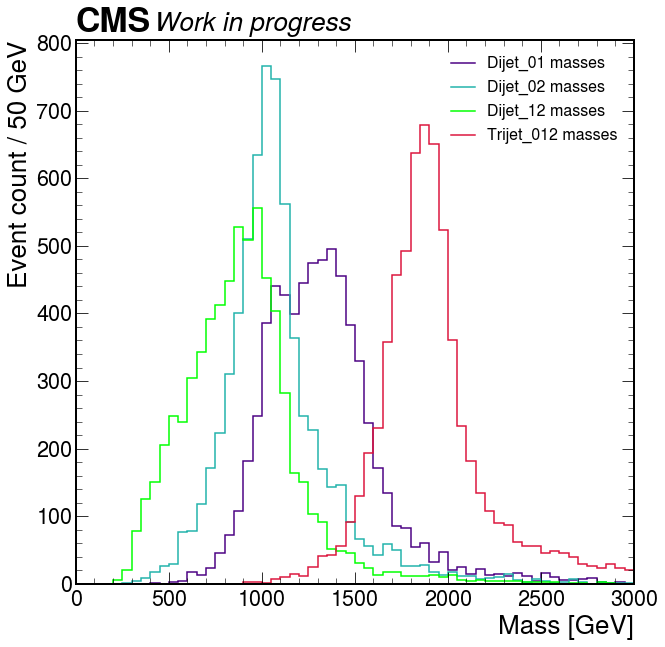

In [35]:
#all on one plot

#dijet01
counts, edges = hist2array(hDijet01Masses,return_edges=True)
edges = edges[0]
hep.histplot(counts,edges,label="Dijet_01 masses", color = "indigo")

#dijet02
counts, edges = hist2array(hDijet02Masses,return_edges=True)
edges = edges[0]
hep.histplot(counts,edges,label="Dijet_02 masses", color="lightseagreen")


#dijet12
counts, edges = hist2array(hDijet12Masses,return_edges=True)
edges = edges[0]
hep.histplot(counts,edges,label="Dijet_12 masses", color="lime")


#trijet
plt.style.use([hep.style.CMS])
counts, edges = hist2array(hTrijet012Masses,return_edges=True)
edges = edges[0]
hep.histplot(counts,edges,label="Trijet_012 masses", color = "crimson")




hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 3000])
plt.legend(prop={'size': 16})
